# Drawing Quantum Circuits with QuAIRKit

<em style="color:gray;">Copyright (c) 2025 QuAIR team. All Rights Reserved.</em>

This tutorial provides a guide on how to easily draw quantum circuits using QuAIRKit, based on the [Quantikz](https://ctan.org/pkg/quantikz) package.

**Table of Contents**

- [Introduction](#Introduction)
  - [Why Use LaTeX for Drawing?](#Why-Use-LaTeX-for-Drawing?) 
  - [Why Choose Quantikz Over Qcircuit?](#Why-Choose-Quantikz-Over-Qcircuit?)
- [Installing a TeX Distribution](#Installing-a-TeX-Distribution)
- [Visualizing Quantum Circuits with QuAIRKit](#Visualizing-Quantum-Circuits-with-QuAIRKit)
  - [Custom Oracles and Parametric Oracles](#custom-oracles-and-parametric-oracles)
  - [Quantum Channels](#quantum-channels)
  - [Parameterized Layers](#parameterized-layers)
  - [Permutations](#permutations)
  - [Measurement and Collapse](#measurement-and-collapse)
- [Putting Circuit Plots into the Paper](#putting-circuit-plots-into-the-paper)
  - [Plot Styles](#plot-styles)
  - [Submitting to arXiv](#submitting-to-arxiv)

In [1]:
import numpy as np

import quairkit as qkit
from quairkit import Circuit
from quairkit.database import *

## Introduction

### Why Use LaTeX for Drawing?

LaTeX remains the standard tool for academic writing due to its unmatched typesetting quality and precise control over mathematical formatting. For quantum computing research, where diagrams often include complex gate arrangements or layered structures, LaTeX ensures clarity and publication-ready results. It also integrates well with collaborative platforms like Overleaf and arXiv workflows.

### Why Choose Quantikz Over Qcircuit?

While Qcircuit was widely used in earlier works, it relies on the outdated Xy-pic system and requires verbose, low-level syntax. Quantikz, built on TikZ, offers a more modern, readable, and flexible alternative. For example, a three-qubit controlled gate can be written cleanly as:

```latex
\begin{quantikz}
\lstick{\ket{0}} & \ctrl{1} & \qw \\
\lstick{\ket{0}} & \ctrl{1} & \qw \\
\lstick{\ket{0}} & \targ{} & \qw
\end{quantikz}
```

Quantikz also supports features like automatic slicing, gate coloring, and logical grouping—useful in both publications and presentations. Its active maintenance and growing user base make it a reliable choice for modern quantum circuit diagrams.

For full documentation, see [1].

## Installing a TeX Distribution

To compile and preview the generated quantum circuits, you need to have a local TeX distribution. A popular choice is **TeX Live**. Below is a configuration guide for setting up VSCode with TeX Live and LaTeX Workshop.

[TeX Live](https://www.tug.org/texlive/) is an easy way to get up and running with the TeX document production system. Download: [Windows](https://www.tug.org/texlive/windows.html) / [Mac](https://www.tug.org/mactex/) / [Unix](https://www.tug.org/texlive/quickinstall.html).

After running the installer, open the terminal and run the command `latex --version` to ensure that TeX Live is correctly installed.

For advanced usage, one can modify VSCode settings to set up the LaTeX compilation tools. See [Texlive+VSCode Configuration in Mac and Win10](https://github.com/kuxuanwang/Texlive-VSCode_Configuration_in_Mac_and_Win10).

## Visualizing Quantum Circuits with QuAIRKit
QuAIRKit provides a flexible way to visualize quantum circuits using LaTeX/Quantikz. This tutorial helps you to understand how to use the `Circuit` interface, including gates, layers, oracles, quantum channels, and permutations.

### Custom Oracles and Parametric Oracles

In quantum computing, an oracle is a black-box unitary operator that encodes problem-specific information. For example, Grover's algorithm or many variational quantum algorithms rely on inserting user-defined oracles into a circuit.

QuAIRKit allows you to insert custom unitaries as oracles and control their layout with LaTeX names and optional controls.

#### Basic Oracles

You can add an oracle using a user-defined unitary matrix. Here's how to insert a 2-qubit oracle between qubits 0 and 2.

**Note:** When a qubit that is not affected by a quantum gate passes through the gate, there will be a blank space in the diagram.

The diagram of a quantum circuit containing an oracle:


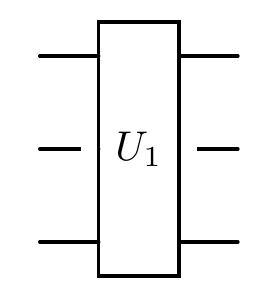

In [2]:
unitary = random_unitary(2)
cir = Circuit(5)
cir.oracle(unitary, [0, 2], latex_name=r'U_1')
print("The diagram of a quantum circuit containing an oracle:")
cir.plot()

#### Controlled Oracles

You can also add oracles with controls, including multi-qubit controls.

The diagram of the quantum circuit after adding a controlled oracle:


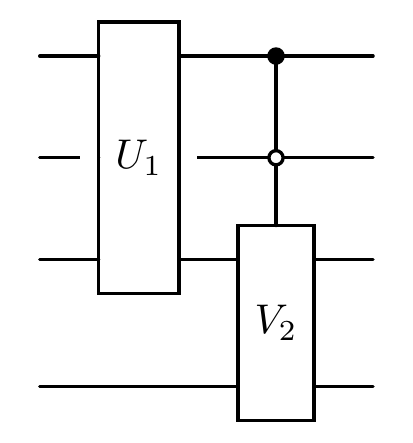

In [3]:
cir.oracle(unitary, [[0, 1], 2, 3], control_idx=2, latex_name=r'V_2')
print("The diagram of the quantum circuit after adding a controlled oracle:")
cir.plot()

When passing a list like `system_idx = [[0, 1], 2, 3]`, the oracle acts on qubits `[0, 1, 2, 3]`, where `0` and `1` are control qubits, and `2`, `3` are target qubits.

The `control_idx` specifies which basis state of the control qubits (interpreted as a binary number) triggers the oracle. For example, if the control qubits are $[q_0, q_1]$, then the four possible control conditions and their corresponding `control_idx` values are:

<small>

| `control_idx` | Binary         | Trigger Condition | Circuit Notation |
|:-------------:|:--------------:|:------------------|:------------------|
| 0             | 00             | $q_0=\ket{0}, q_1=\ket{0}$        | ○──○              |
| 1             | 01             | $q_0=\ket{0}, q_1=\ket{1}$        | ○──●              |
| 2             | 10             | $q_0=\ket{1}, q_1=\ket{0}$        | ●──○              |
| 3             | 11             | $q_0=\ket{1}, q_1=\ket{1}$        | ●──●              |

</small>

Thus, setting `control_idx=2` corresponds to triggering the oracle when $q_0=\ket{1}$ and $q_1=\ket{0}$, as visually shown in the diagram.

#### Parametric Oracles

Parametric oracles apply known gates such as rotations, with optional control:

The diagram of the quantum circuit after adding two parametric oracles:


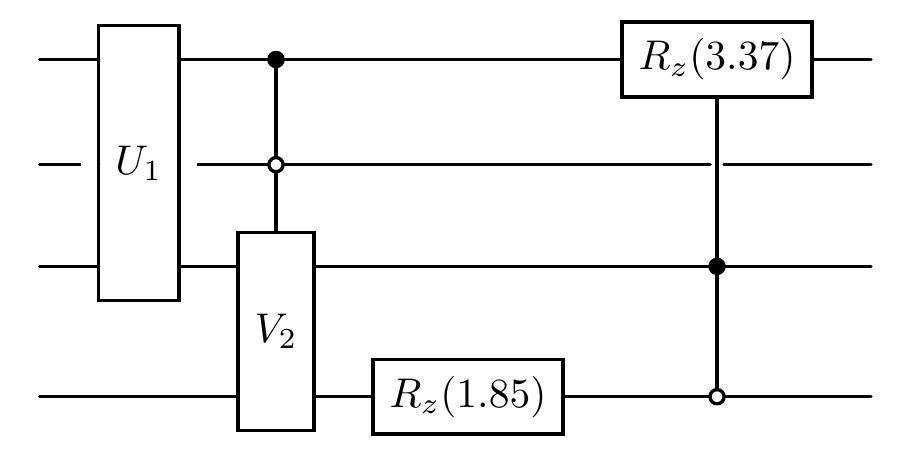

In [4]:
cir.param_oracle(rz, 1, [3], latex_name=r'R_z')
cir.param_oracle(rz, 1, [[3, 2], 0], control_idx=1, latex_name=r'R_z')
print("The diagram of the quantum circuit after adding two parametric oracles:")
cir.plot()

You can retrieve their parameters using the `cir.param` attribute.

In [5]:
print('The parameters of circuit are', cir.param)

The parameters of circuit are tensor([1.8479, 3.3738])


#### Oracles on Qudits

You can define a circuit with custom system dimensions by passing a list to `system_dim`.

The diagram of a qudit oracle:


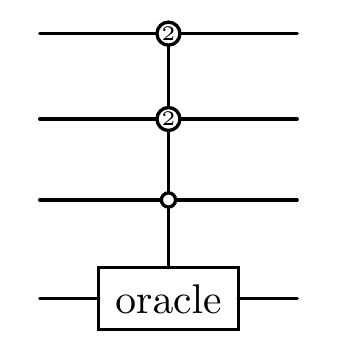

In [6]:
unitary = random_unitary(1, system_dim=5)

# Create a circuit where qubits 0,1,2,3 have dimensions [3, 4, 5, 5]
cir_mix_qudit = Circuit(4, system_dim=[3, 4, 5, 5])

# Apply a 3-qudit oracle from qudits [0,1,2] to qudit 3, with a large control index
cir_mix_qudit.oracle(unitary, [[0, 1, 2], 3], control_idx=50)
print("The diagram of a qudit oracle:")
cir_mix_qudit.plot()

In this example, `system_dim = [3, 4, 5, 5]`, so the control qudits `[0, 1, 2]` have dimensions 3, 4, and 5 respectively. The total control space has dimension: $3 \times 4 \times 5 = 60$.

Setting `control_idx = 50` means the oracle is triggered only when the control qudits are in the basis state corresponding to index 50, which refers to one specific combination among the 60 possible control states.

### Quantum Channels
 
Real quantum hardware is noisy, and simulating realistic noise is essential for designing robust circuits. QuAIRKit supports several common quantum channels as high-level objects.

The diagram of the quantum circuit after adding noise channels:


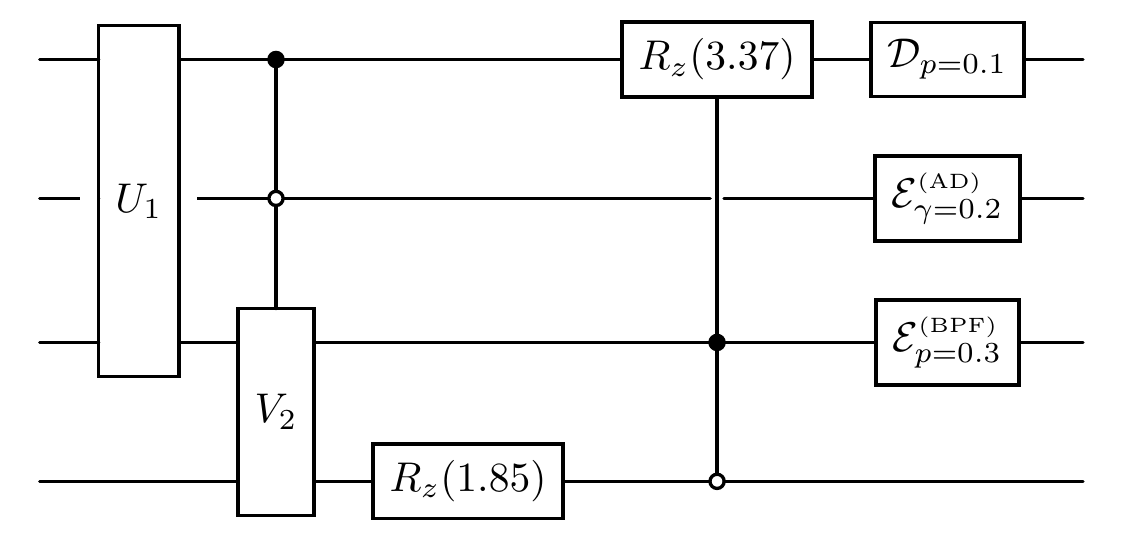

In [7]:
cir.depolarizing(0.1, 0)        # depolarizing channel on qubit 0
cir.amplitude_damping(0.2, 1)   # amplitude damping on qubit 1
cir.bit_phase_flip(0.3, 2)      # bit-phase flip on qubit 2
print("The diagram of the quantum circuit after adding noise channels:")
cir.plot()

### Parameterized Layers

In many variational circuits (e.g., quantum neural networks, ansätze for VQE), we apply the same gate pattern repeatedly across qubits. QuAIRKit supports template layers that apply parametrized rotations and entangling gates in a structured way.

The diagram of the quantum circuit after adding linear entangled and complex block layers:


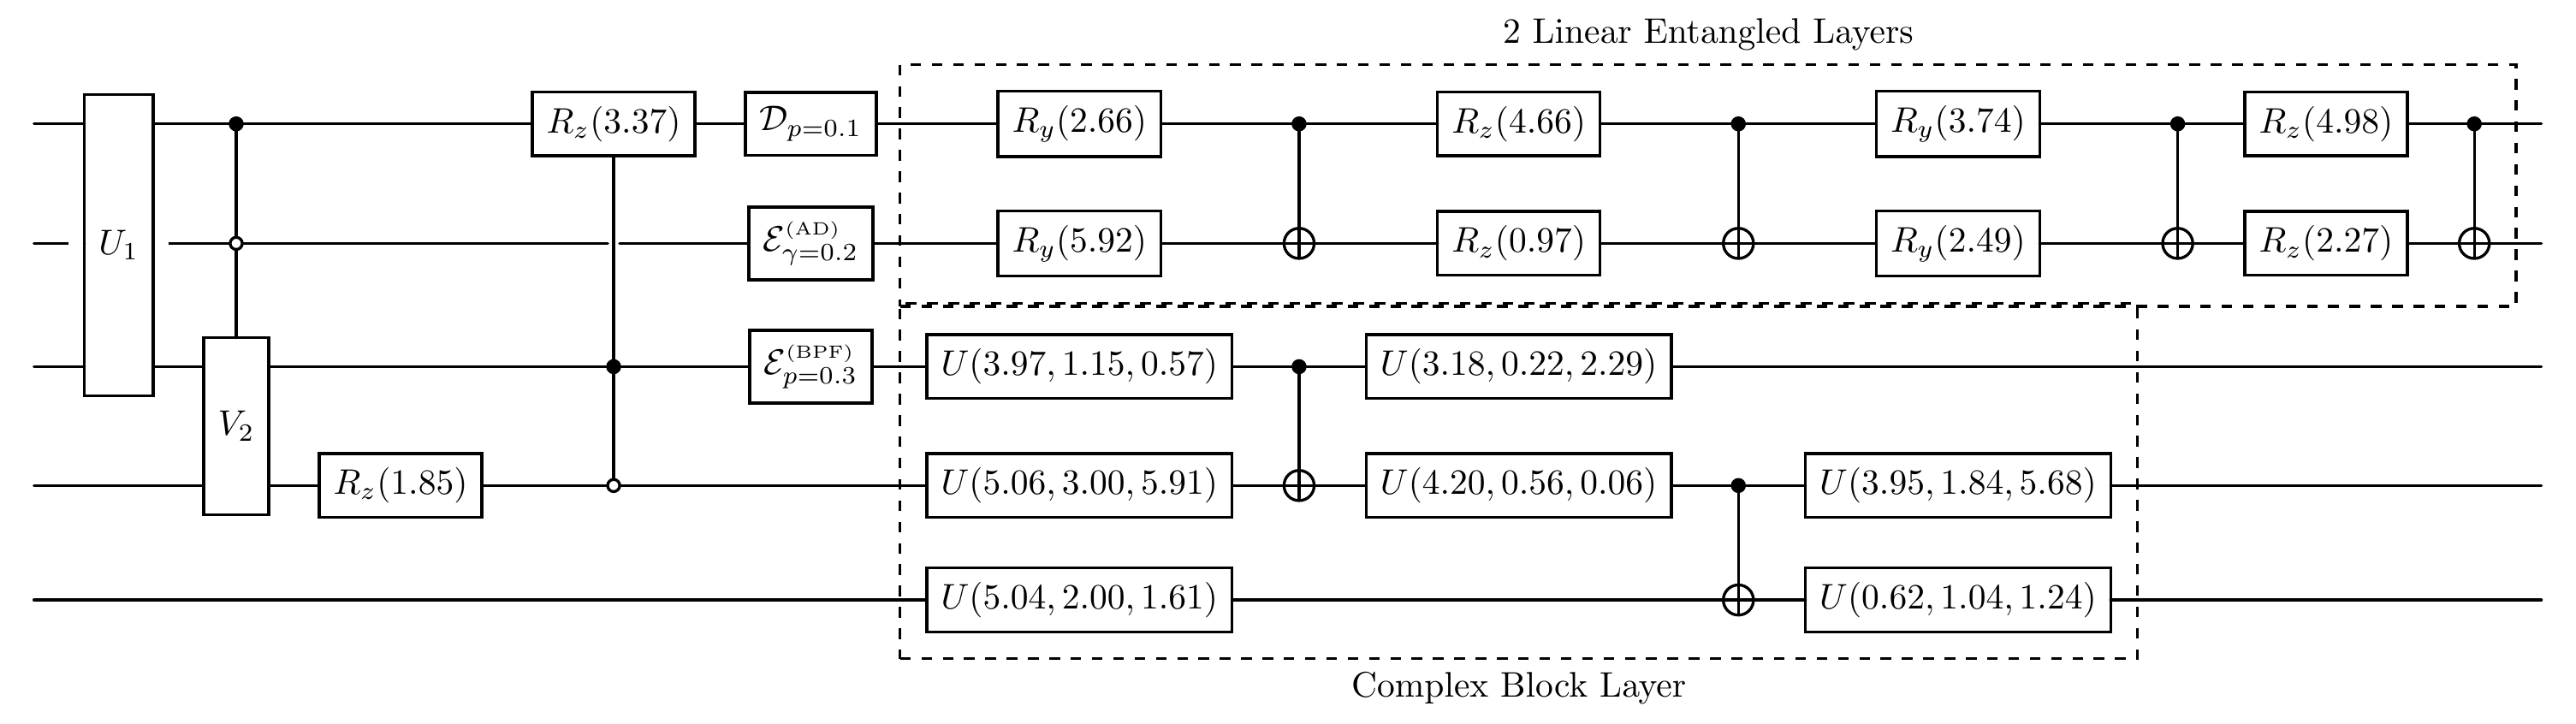

In [8]:
cir.linear_entangled_layer([0, 1], depth=2)
cir.complex_block_layer([2, 3, 4])
print("The diagram of the quantum circuit after adding linear entangled and complex block layers:")
cir.plot()

QuAIRKit circuits are built as layered structures — each gate, oracle, channel, layer or measurement is stored as an individual component. You can visualize any circuit layer using its index.

In [9]:
cir[8]

ComplexBlockLayer(
  (0): U3()
  (1): CNOT()
  (2): U3()
  (3): CNOT()
  (4): U3()
)

The diagram of the ninth component of the circuit:


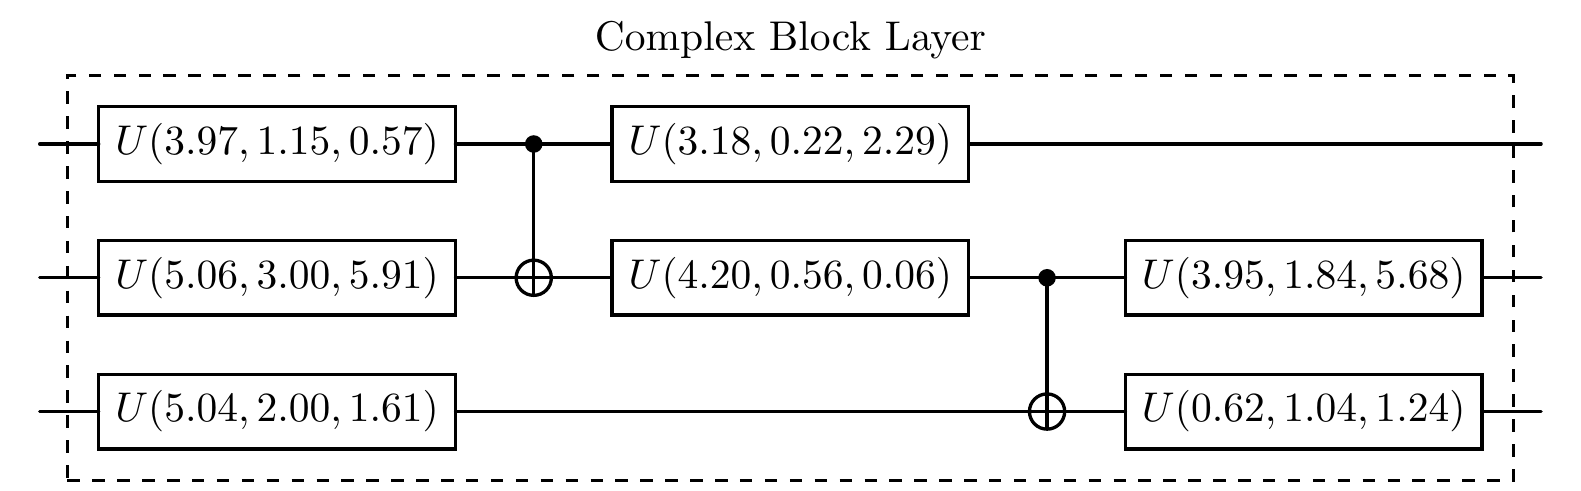

In [10]:
print("The diagram of the ninth component of the circuit:")
cir[8].plot()

### Permutations

Swaps and permutations are essential for rearranging qubits to satisfy hardware connectivity constraints, simulating fermionic systems that require specific exchange operations, or implementing controlled reordering procedures in quantum algorithms such as quantum sorting and teleportation.

#### SWAP and CSWAP Gates

SWAPs are rendered with crossing wires.

The diagram of the quantum circuit after adding a controlled-SWAP and a SWAP gate:


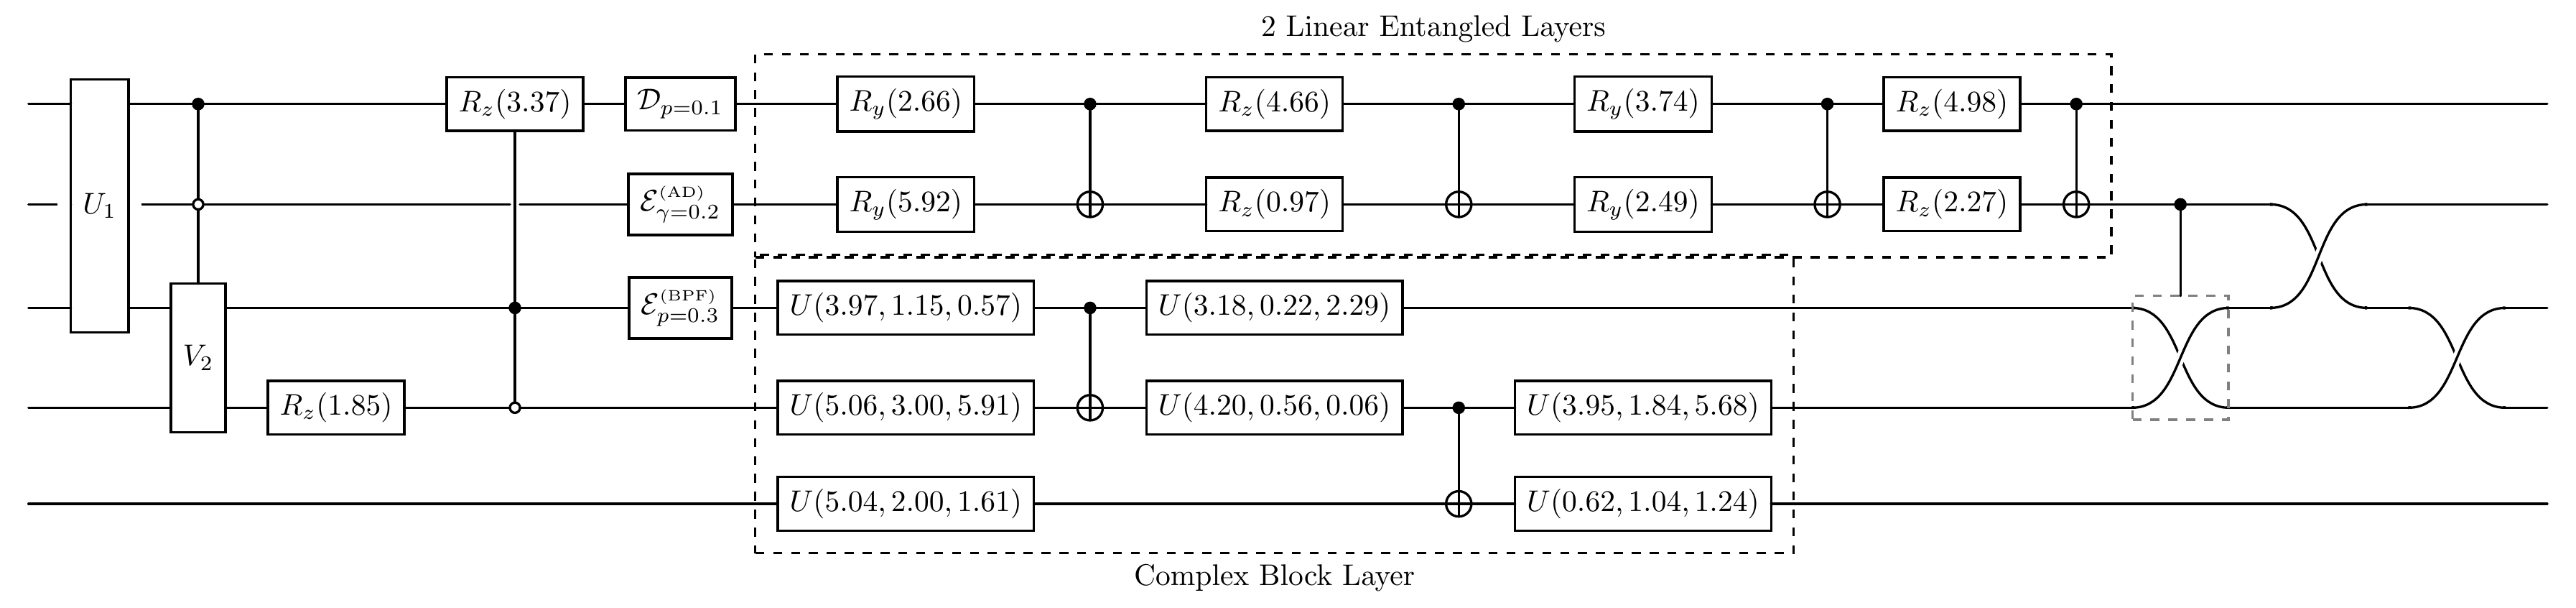

In [11]:
cir.cswap([1, 2, 3])               # controlled-SWAP (Fredkin gate)
cir.swap([[1, 2], [2, 3]])  
print("The diagram of the quantum circuit after adding a controlled-SWAP and a SWAP gate:")
cir.plot()

#### Permute

Unlike SWAPs which only exchange two systems, `permute` can reorder a subset arbitrarily.

The diagram of a quantum circuit containing a general permutation and a controlled permutation:


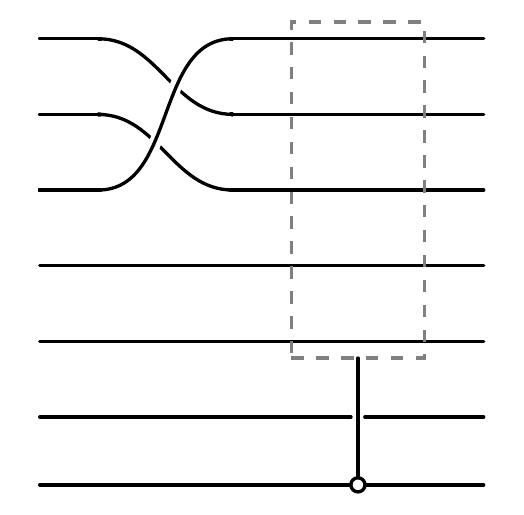

In [12]:
# Generate a random permutation of 3 elements: [0, 1, 2] shuffled
perm_1 = list(range(3))
np.random.shuffle(perm_1)

perm_2 = list(range(4))
np.random.shuffle(perm_2)

# Randomly select distinct system indices from a pool of 5 qudits
idx1 = np.random.choice(5, size=3, replace=False).tolist()
idx2 = np.random.choice(5, size=4, replace=False).tolist()

cir_permute = Circuit(7)
# Apply a general (uncontrolled) permutation of idx1 qudits using perm_1
cir_permute.permute(perm_1, idx1)
# Apply a controlled permutation (controlled by qudit 6) on idx2 qudits using perm_2
cir_permute.permute(perm_2, [6] + idx2, control_idx=0)  # control qudit: 6
print("The diagram of a quantum circuit containing a general permutation and a controlled permutation:")
cir_permute.plot()

### Measurement and Collapse

Measurements collapse quantum states into classical outcomes. In QuAIRKit, you can simulate both:
- Standard measurement (with probabilities)
- Post-selection (force a system to collapse to a given outcome)
- Qubit reset (collapse to $|0 \rangle$ by default)

In [13]:
cir_meas = Circuit(2)

cir_meas.complex_entangled_layer([0, 1])

# Measure qubit 0 and post-select it to be in state |0⟩
# 'if_print=True' will print the average post-selection probability
cir_meas.measure(0, post_selection=0, if_print=True)

cir_meas.complex_entangled_layer([0, 1])
cir_meas.depolarizing(0.8)

# Partial trace and then reset qubit 1 to |0⟩
cir_meas.reset(1)

cir_meas.complex_entangled_layer([0, 1])

# Perform a final measurement on qubit 0 (no post-selection)
# The outcome will contribute to the final probability distribution
cir_meas.measure(0)

Now simulate and observe the result:

systems [0] collapse to the state |0> with (average) probability 0.9999847412109375
The diagram of a quantum circuit containing complex layers and subsequent measurements and post-selections:


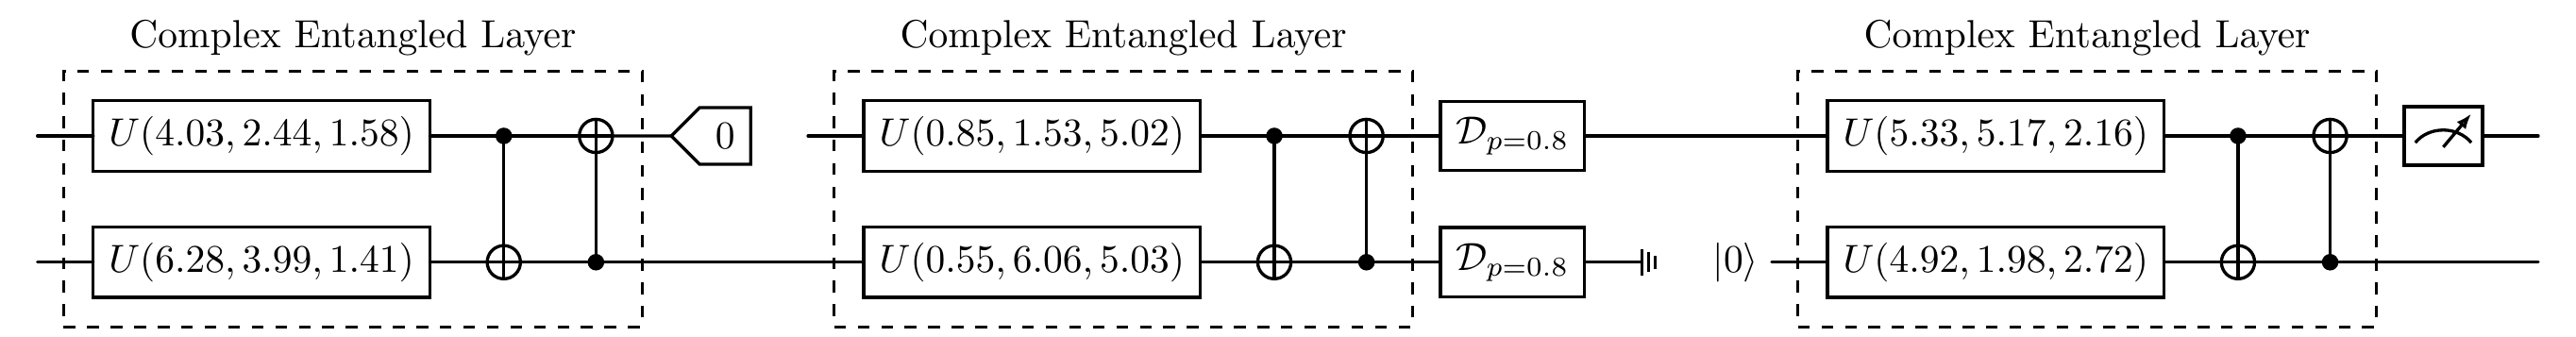

The probability distribution of the last measurement after post-selections is tensor([[0.4944, 0.5056]], grad_fn=<MulBackward0>)


In [14]:
output_state = cir_meas()
print("The diagram of a quantum circuit containing complex layers and subsequent measurements and post-selections:")
cir_meas.plot()
print('The probability distribution of the last measurement after post-selections is', output_state.probability)

## Putting Circuit Plots into the Paper

### Plot styles
There are three plot styles supported by QuAIRKit:

- `standard` (default) : Suitable for general audiences and academic publications.
- `compact`: A minimalistic style focusing on circuit structure, suitable for quantum neural network researchers.
- `detailed`: Shows full gate/channel/operator labels, suitable for quantum algorithm designers. 

The `plot()` function accepts additional parameters for fine control over the diagram:

- dpi: Output resolution (default: 300).
- print_code: If `True`, prints the underlying LaTeX code.
- show_plot: Displays the plot immediately (default: `True`).
- include_empty: Determines whether to include empty lines in the output (default: False).
- latex:  
  - If `True` (default), the circuit is rendered using Quantikz.
  - If `False`, the circuit will be displayed in matplotlib format (which will be depreciated in the near future).

**Notice**: Since QuAIRKit 0.4.0, Quantikz is the recommended and default backend for rendering, ensuring best compatibility and aesthetics.

Please feel free to adjust these parameters:

the diagram of a quantum circuit with compact style and 400 dpi, as well as printing the latex code:

\documentclass[border=2pt]{standalone}

% WARNING: please disable other quantum circuit packages, such as qcircuit
\usepackage{tikz}
\usetikzlibrary{quantikz2}

\begin{document}

\begin{quantikz}[transparent]
\lstick{} & \gate[3]{U_1} & \ctrl[]{2} & {} & \gate[1]{R_z} & \gate[1]{\mathcal{D}_{p = 0.1}} & \gate[1]{R_{y}}\gategroup[2,steps=4,style={inner sep=4pt,dashed,label={above:{Linear Entangled Layer$\times 2$}}}]{} & \ctrl[]{1} & \gate[1]{R_{z}} & \ctrl[]{1} & {} & {} & {} & {} & \rstick{} \\
\lstick{} & \gateinput[label style={xshift=-8.2pt}]{$\textcolor{white}{\rule{4pt}{4pt}}$}\gateoutput[label style={xshift=8.2pt}]{$\textcolor{white}{\rule{4pt}{4pt}}$} & \control[style={fill=white,draw=black,inner sep=1pt}]{} & {} & \push{\,\,} & \gate[1]{\mathcal{E}_{\gamma = 0.2}^{\textrm{\tiny{(AD)}}}} & \gate[1]{R_{y}} & \targ{} & \gate[1]{R_{z}} & \targ{} & {} & \ctrl[]{1} & \gate[2,style={

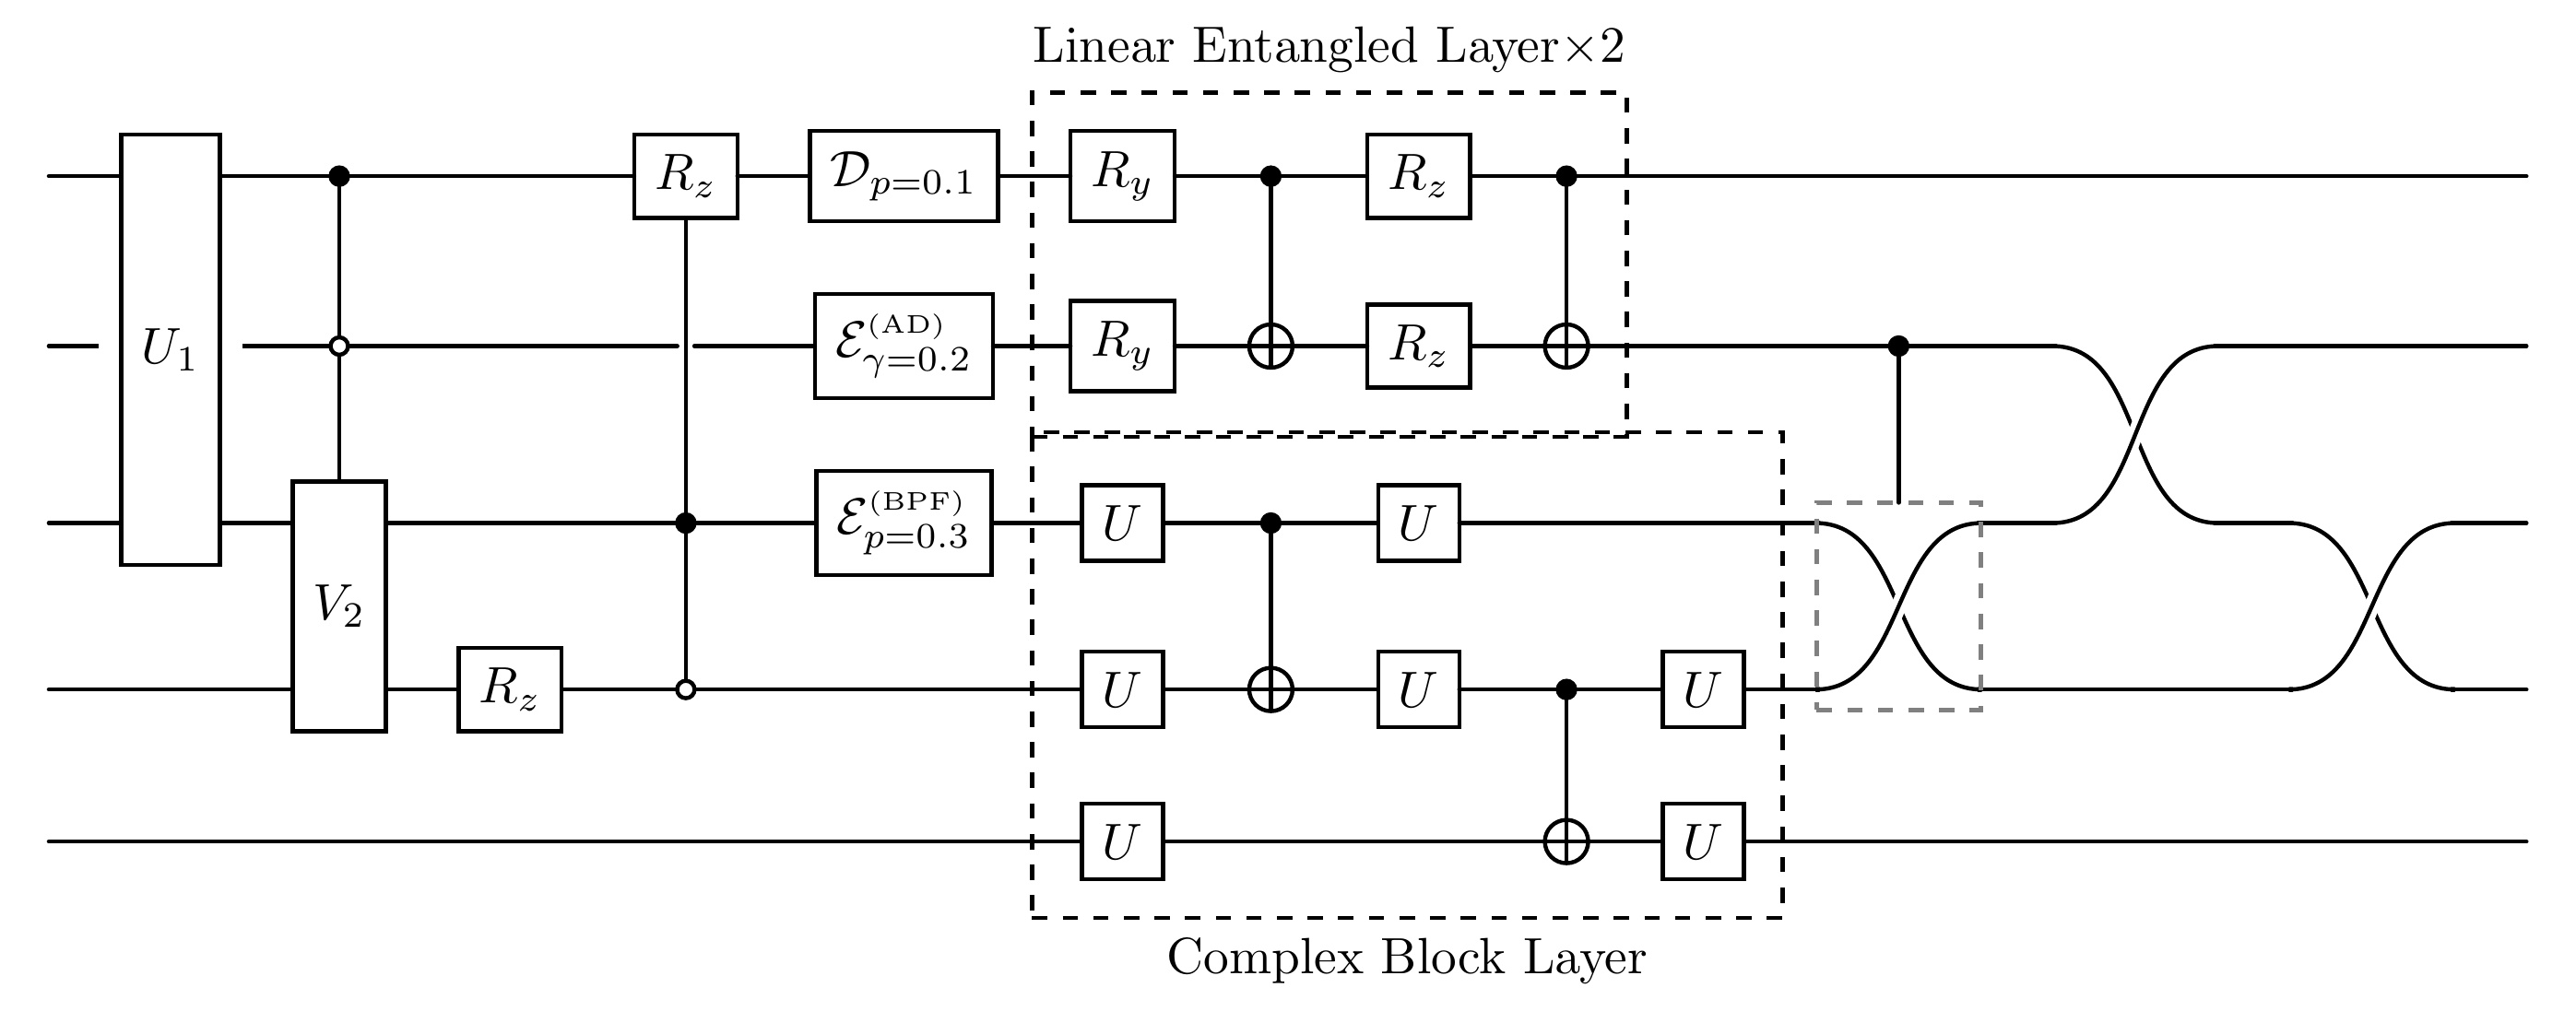

In [15]:
print("the diagram of a quantum circuit with compact style and 400 dpi, as well as printing the latex code:\n")
cir.plot(style="compact", dpi=400, print_code=True)

### Submitting to arXiv

When using `print_code=True`, QuAIRKit will export the underlying LaTeX (Quantikz) code for your circuit. To include it in your LaTeX document:

```latex
\usepackage{tikz}
\usetikzlibrary{quantikz}
```

Then include your exported code inside:
```latex
\begin{quantikz}[transparent]
  % (paste the code here)
\end{quantikz}
```

**Tip 1**: The `quantikz` package is not yet included in arXiv’s default TeX installation. If you want your LaTeX document to compile on arXiv, you need to manually include the `tikzlibraryquantikz2.code.tex` file in your submission. You can find this file in your local TeX installation (typically under your `texmf` tree) if you've installed quantikz. Place the file in the same directory as your main `.tex` file.

**Tip 2**: If you're using QuAIRKit on macOS and encounter an error like:
```bash
OSError: Unable to get page count. Is poppler installed and in PATH?
```
This means the `poppler` library (required for rendering PDFs into images) is not installed. You can fix this by running `conda install poppler`.

**Tip 3**: If you do not want to worry about these "messes" for submission, a naive approach is to compile it in Overleaf (which includes `quantikz`) and save the figure as pdf file.

---

## References

[1] Kay, Alastair. "Tutorial on the quantikz package." arXiv preprint arXiv:1809.03842 (2018).

*Table: A reference of notation conventions in this tutorial.*
| Symbol        | Description                               |
|:---------------:|-------------------------------------------|
|$R_{x/y/z}(\theta)$| Rotation gate about the $X$/$Y$/$Z$-axis with angle $\theta$|
| $\mathcal{D}_p$   | Depolarizing channel with depolarizing probability $p$                 |
| $\mathcal{E}^{(\mathrm{AD})}_\gamma$ | Amplitude damping channel with damping rate $\gamma$                   |
| $\mathcal{E}^{(\mathrm{BPF})}_p$ | Bit-phase flip channel with error probability $p$                      |
| $U3 / U(\theta, \phi, \lambda)$  | General single-qubit unitary gate: $\begin{bmatrix} \cos \frac{\theta}{2} & -e^{i\lambda} \sin \frac{\theta}{2} \\ e^{i\phi} \sin \frac{\theta}{2} & e^{i(\phi + \lambda)} \cos \frac{\theta}{2} \end{bmatrix}$ |

In [16]:
qkit.print_info()


---------VERSION---------
quairkit: 0.4.2
torch: 2.8.0+cu128
torch cuda: 12.8
numpy: 2.2.6
scipy: 1.15.3
matplotlib: 3.10.6
---------SYSTEM---------
Python version: 3.10.18
OS: Linux
OS version: #1 SMP Tue Nov 5 00:21:55 UTC 2024
---------DEVICE---------
CPU:  13th Gen Intel(R) Core(TM) i9-13980HX
GPU: (0) NVIDIA GeForce RTX 4090 Laptop GPU
